In [1]:
cd ..

/Users/mourad/workspace/polyaxon


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.python.estimator.inputs.inputs import numpy_input_fn, pandas_input_fn

from examples.timeseries import create_experiment, generate_data, sin_cos

TIMESTEPS = 7
X, y = generate_data(sin_cos, np.linspace(0, 100, 10000, dtype=np.float32), TIMESTEPS, seperate=False)
xp = create_experiment('/tmp/polyaxon_logs/sin_cos', X, y, output_units=2)

INFO:tensorflow:Using config: {'_model_dir': '/tmp/polyaxon_logs/sin_cos', '_session_config': None, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': None, '_keep_checkpoint_every_n_hours': 4, '_save_summary_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_save_checkpoints_steps': 100, '_master': '', '_num_worker_replicas': 0, '_evaluation_master': '', '_task_type': None, '_num_ps_replicas': 0, '_is_chief': True, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1139e0d68>, '_environment': 'local'}


In [5]:
xp.continuous_train_and_evaluate()

INFO:tensorflow:Training model for 100 steps
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/polyaxon_logs/sin_cos/model.ckpt.
INFO:tensorflow:step = 1, loss = 0.498125
INFO:tensorflow:Saving checkpoints for 100 into /tmp/polyaxon_logs/sin_cos/model.ckpt.
INFO:tensorflow:Loss for final step: 0.00256331.
INFO:tensorflow:Evaluating model now.
INFO:tensorflow:Starting evaluation at 2017-06-29-10:34:06
INFO:tensorflow:Restoring parameters from /tmp/polyaxon_logs/sin_cos/model.ckpt-100
INFO:tensorflow:Evaluation [1/10]
INFO:tensorflow:Evaluation [2/10]
INFO:tensorflow:Evaluation [3/10]
INFO:tensorflow:Evaluation [4/10]
INFO:tensorflow:Evaluation [5/10]
INFO:tensorflow:Evaluation [6/10]
INFO:tensorflow:Evaluation [7/10]
INFO:tensorflow:Evaluation [8/10]
INFO:tensorflow:Evaluation [9/10]
INFO:tensorflow:Evaluation [10/10]
INFO:tensorflow:Finished evaluation at 2017-06-29-10:34:07
INFO:tensorflow:Saving dict for global step 100: global_step = 100,

INFO:tensorflow:Evaluation [9/10]
INFO:tensorflow:Evaluation [10/10]
INFO:tensorflow:Finished evaluation at 2017-06-29-10:35:13
INFO:tensorflow:Saving dict for global step 500: global_step = 500, loss = 5.86872e-05, streaming_mean_absolute_error = 0.00665366, streaming_root_mean_squared_error = 0.00766076
INFO:tensorflow:Training model for 100 steps
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/polyaxon_logs/sin_cos/model.ckpt-500
INFO:tensorflow:Saving checkpoints for 501 into /tmp/polyaxon_logs/sin_cos/model.ckpt.
INFO:tensorflow:step = 501, loss = 1.50659e-05
INFO:tensorflow:Saving checkpoints for 600 into /tmp/polyaxon_logs/sin_cos/model.ckpt.
INFO:tensorflow:Loss for final step: 8.52785e-05.
INFO:tensorflow:Evaluating model now.
INFO:tensorflow:Starting evaluation at 2017-06-29-10:35:28
INFO:tensorflow:Restoring parameters from /tmp/polyaxon_logs/sin_cos/model.ckpt-600
INFO:tensorflow:Evaluation [1/10]
INFO:tensorflow:Evaluation [2/10]


INFO:tensorflow:Starting evaluation at 2017-06-29-10:36:25
INFO:tensorflow:Restoring parameters from /tmp/polyaxon_logs/sin_cos/model.ckpt-1000
INFO:tensorflow:Evaluation [1/10]
INFO:tensorflow:Evaluation [2/10]
INFO:tensorflow:Evaluation [3/10]
INFO:tensorflow:Evaluation [4/10]
INFO:tensorflow:Evaluation [5/10]
INFO:tensorflow:Evaluation [6/10]
INFO:tensorflow:Evaluation [7/10]
INFO:tensorflow:Evaluation [8/10]
INFO:tensorflow:Evaluation [9/10]
INFO:tensorflow:Evaluation [10/10]
INFO:tensorflow:Finished evaluation at 2017-06-29-10:36:25
INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 2.8089e-05, streaming_mean_absolute_error = 0.00460688, streaming_root_mean_squared_error = 0.0052999
INFO:tensorflow:Stop training model as max steps reached


({'global_step': 1000,
  'loss': 2.8088974e-05,
  'streaming_mean_absolute_error': 0.0046068826,
  'streaming_root_mean_squared_error': 0.0052999035},
 [])

INFO:tensorflow:Restoring parameters from /tmp/polyaxon_logs/sin_cos/model.ckpt-1000


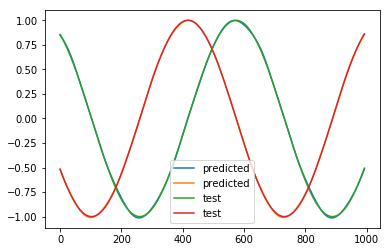

In [8]:
predicted = [i['results'] for i in xp.estimator.predict(numpy_input_fn({'x': X['test']}, shuffle=False))]
plot_predicted = plt.plot(predicted, label='predicted')
plot_test = plt.plot(y['test'], label='test')
plt.legend(handles=plot_predicted+plot_test)